# Bone Break Classification
By: Mimmy Mei, Sophia Huang, Charlotte Li, McKenzie Skrastins

**Goals**: The take-aways from this notebook are:
1.   Understand what a YOLO model is and how it works
2.   Implement a YOLO model
3.   Learn how to improve the model, including the different optimisers.

**Bone Fracture Dataset**:
https://figshare.com/articles/dataset/The_dataset/22363012?file=43283628

## Sections in this Notebook

* [Background](#scrollTo=Background)
* [Data](#scrollTo=Data)
* [YOLO Model](#scrollTo=YOLO_Model)
* [Results](#scrollTo=Results)
* [Analysis](#scrollTo=Analysis)
* [Conclusion](#scrollTo=Conclusion)
* [References](#scrollTo=References)



---

## Background

Bone fractures are common injuries, yet the National Institute for Health and Care Excellence reported that up to 10% of broken bone cases go undiagnosed. Successfully identifying and properly treating fractures is imperative to ensuring a patient's fast and full recovery. By increasing the accuracy and diagnosis speed of broken bones, patient outcomes will improve. It can also reduce the amount of pressure that is put on orthopedists, who are typically short on supply. One solution that will improve diagnosis accuracy and speed of broken bones is a You Only Look Once (YOLO) model that identifies the fractured area.

In recent years, there has been lots of discussion regarding the use of AI in fracture diagnosis. Many algorithms and techniques (machine learning and specialized neural networks) have been used together to increase accuracy and sensitivity. However, in her 2023 paper, Sharma noted that although AI has potential to help health professionals, but there are ethical and regulatory challenges around its use. Examples of ethical concerns are patient privacy, data security, and informed consent. Regulatory issues include limited high quality labeled fracture datasets to train on, and a lack of interpretability and transparency. Furthermore, issues can arise if the AI fails to detect a fracture or gives a false positive, since it leads to delayed treatment and wrong diagnosis. Hussain et al. (2023) posed the question, "Can AI replace health professionals?". Their analysis found the answer to be "no", because of the challenges mentioned above. Despite this, when used as a support tool, AI can significantly help both patients and doctors.

An example of AI, specifically YOLO, being used as a support tool for fracture diagnosis is in Liu's (2024) study; he classifies where on the body a fracture is. Another example of YOLO being used as a support tool is Samothai et al.'s (2022) comparison of the performace of YOLOR and YOLOX on classifying X-rays as either containing fractured bones or non-fractured bones.

These studies show that the use of AI to classify bone fractures is not only possible, but useful in a medical setting.

This write-up aims to answer the questions, "How accurately can AI predict the location of a bone fracture?" and "Should such a model be incorporated into the medical field?"

## YOLO Model

There are many different deep learning techniques that can be used to classify bone fractures, but YOLO has proven to be one of the most efficient.

The YOLO algorithm, at its core, is a convolutional neural network (CNN) followed by data post processing (Parti, 2024).

At the beginning of the algorithm, an image of a fixed size is inserted into the CNN. Filters are applied to extract features and the images are sent through activation functions. A grid is generated and placed on top of the image. Based on what the CNN observed from training, each "cell" will be tasked with deciding the probability that a specific object is contained within it (Dey, 2023). This probability, along with a handful of other attributes, will be stored in a vector. The other attributes stored in the vector are the X coordinate, y coordinate, width, and height of the predicted bounding box of the object, and an integer associated with the class label. Note that any given cell can be tasked with predicting multiple classes, but in this case, "*Fractured*" or class 1, was the only one used. What results from the image going through the CNN is a ZxZxN tensor, where

ZxZ = the number of boxes generated from the grid,

and,

N = the number of attributes stored in each vector associated with a cell (Parti, 2024).

The following steps are considered to be a part of the post processing step; depending on how many cells the grid creates, hundreds, or even thousands of bounding boxes could be made. To narrow down which boxes to keep, first, a technique called non-maximum supression is used. Two generated bounding boxes are selected, and the intersection of them is divided by their union. This value is called the IoU (intersection over union), and if the IoU exceeds a predetermined threshold, then box with the lower confidence score is discarded (Bhalerao, 2023). By this point, although the number of generated bounding boxes has been narrowed down significantly, there are often still too many. Therefore, the remaining boxes are investigated, and if the confidence score of a box does not meet a predetermined threshold, than the box is discarded (Parti, 2024).

The remaining boxes are presented at the YOLO algorithm's predictions.

## Data

Before the data can be inserted into a YOLO model, it must go through preprocessing.

The dataset used was from a paper called "The Evaluation of Bone Fracture Detection of YOLO Series", which consists of images of fractured and non fractured bones (Abedeen, 2023). The non fractured class was excluded for easier training. First, the dataset is loaded in.

The necessary libraries are imported.

In [ ]:
# Data preprocessing and neural network
import torch
torch.cuda.empty_cache()
from fastai.vision.all import *
import os
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null
!pip install pylabel
from pylabel import importer
import zipfile
import shutil

# Ultralytics YOLO specific
!pip install ultralytics
from ultralytics import YOLO
import yaml
from ultralytics.data.converter import convert_coco

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 53.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


The data was uploaded to Kaggle for ease of downloading into the colab environment.

In [ ]:
# Importing data from kaggle, originally from figshare
%env KAGGLE_USERNAME=sophia4827
%env KAGGLE_KEY=ac334c3351a2af38b3f6b0ce9d9922a6

!kaggle datasets download sophia4827/bone-fracture-data
!unzip bone-fracture-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: FracAtlas/Annotations/YOLO/IMG0003207.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003208.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003209.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003210.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003211.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003212.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003213.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003214.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003215.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003216.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003217.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003218.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003219.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003220.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003221.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003222.txt  
  inflating: FracAtlas/Annotations/YO

The images are checked for discrepancies to ensure they can be used to train the model.

In [ ]:
# First, specify the path to the annotations
path_to_annotations = "/content/FracAtlas/Annotations/COCO JSON/COCO_fracture_masks.json"

# Next, specify the path to the fractured images
path_to_images = "/content/FracAtlas/images/Fractured"

# Making our dataset
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)

img_folder    img_filename img_path  img_id  \
id                                                                         
0   /content/FracAtlas/images/Fractured  IMG0000019.jpg                1   
1   /content/FracAtlas/images/Fractured  IMG0000025.jpg                2   
2   /content/FracAtlas/images/Fractured  IMG0000044.jpg                3   
3   /content/FracAtlas/images/Fractured  IMG0000057.jpg                4   
4   /content/FracAtlas/images/Fractured  IMG0000058.jpg                5   

    img_width  img_height img_depth ann_segmented  ann_bbox_xmin  \
id                                                                 
0        2304        2880                            1242.297030   
1        2880        2304                            1466.504519   
2        2304        2880                            1426.511093   
3        2304        2880                            1130.613861   
4        2304        2880                            1190.019802   

    ann_bbox_ymin  ...  ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  \
id                 ...                                                        
0      929.108911  ...            0                                           
1     2010.557108  ...            0                                           
2     1072.013147  ...            0                                           
3     1119.207921  ...            0                                           
4     1349.702970  ...            0                                           

    ann_difficult cat_id   cat_name cat_supercategory split annotated  
id                                                                     
0                      0  fractured                                 1  
1                      0  fractured                                 1  
2                      0  fractured                                 1  
3                      0  fractured                                 1  
4                      0  fractured                                 1  

[5 rows x 26 columns]

In [ ]:
# Attributes of our dataset, ensure that things are looking normal
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 717
Number of classes: 1
Classes:['fractured']
Class counts:
cat_name
fractured    922
Name: count, dtype: int64
Path to annotations:
/content/FracAtlas/Annotations/COCO JSON


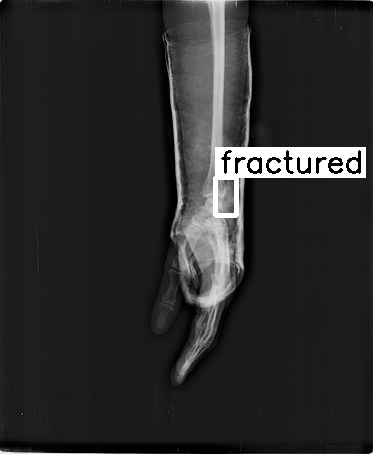

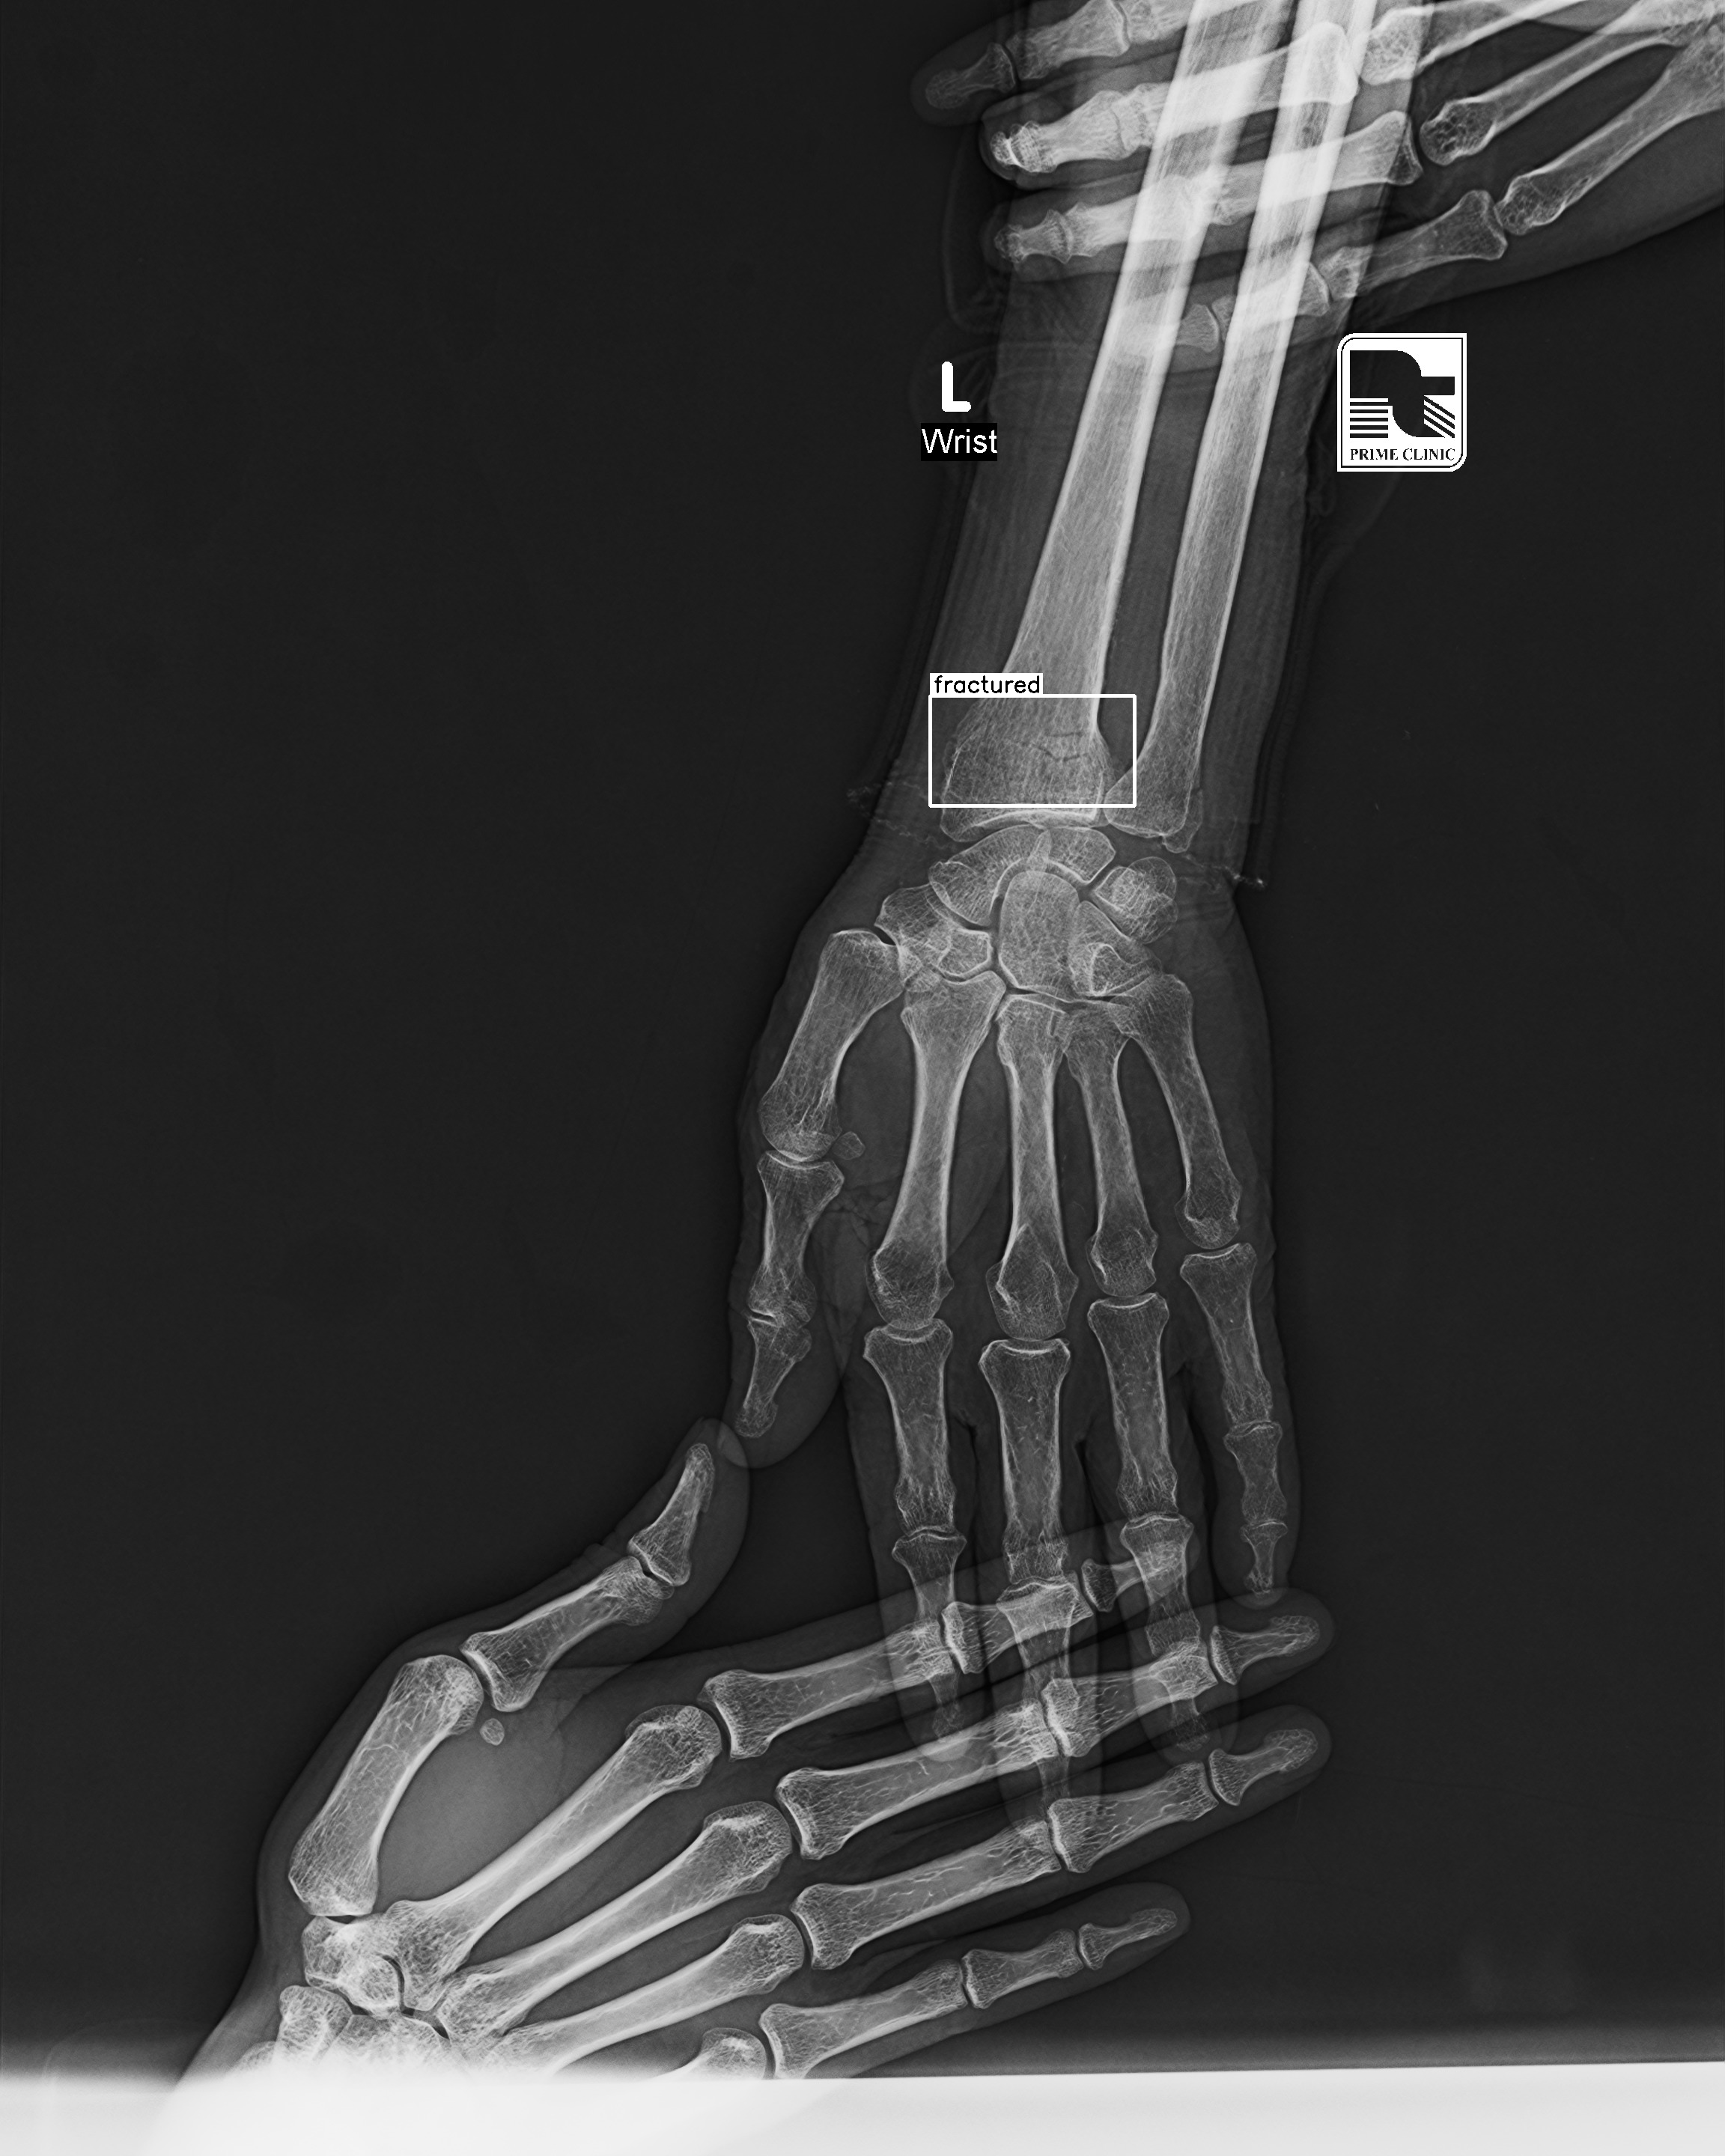

In [ ]:
# Displaying bound boxes on sample image
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes("IMG0000019.jpg"))

No discrepancies were found. Therefore, the data may be seperated into the format needed to create any machine learning or deep learning model: X_train, y_train, X_test, y_test.

When using the Ultralytics YOLO format, it is important to organize the training and validation images and labels correctly.

X is dealt with first. The data was organized into X training and validatiion sets by copying specific images from our source file into a train file and a test file. These specific images were outlined by the authors of the dataset in folders called "train.csv" and "test.csv".

In [ ]:
# Specify what images go in the train and what images go in the test, from our source file
train = pd.read_csv("/content/FracAtlas/Utilities/Fracture Split/train.csv")
valid = pd.read_csv("/content/FracAtlas/Utilities/Fracture Split/valid.csv")
source_dir = "/content/FracAtlas/images/Fractured"

# Specify the files paths.
train_dest_dir = "/content/split_images/train"
valid_dest_dir = "/content/split_images/valid"

# Create directories
os.makedirs(train_dest_dir, exist_ok=True)
os.makedirs(valid_dest_dir, exist_ok=True)

# Copying the images from the source directory to our train and valid directories
for image_id in train['image_id']:
    src_path = os.path.join(source_dir, image_id)
    dest_path = os.path.join(train_dest_dir, image_id)
    shutil.copy(src_path, dest_path)

for image_id in valid['image_id']:
    src_path = os.path.join(source_dir, image_id)
    dest_path = os.path.join(valid_dest_dir, image_id)
    shutil.copy(src_path, dest_path)

Next, y train and valid were handled. "y" is a vector of information about the box containing the "fracture". This information was gathered manually and put into a vector and a txt file. Similar to the steps for X, "train.csv" and "test.csv" were opened, and the image names were recorded. Those names were used as a map to ensure the correct txt files were put into y_train and y_test.

In [ ]:
# YOLO formater function
def to_yolo(row, img_width, img_height):
    class_id = row['cat_id'] # Extract the class ID
    xmin, ymin, xmax, ymax = row['ann_bbox_xmin'], row['ann_bbox_ymin'], row['ann_bbox_xmax'], row['ann_bbox_ymax'] # Coordinates that bound the annotation box

    # Put the coordinates in the YOLO format
    x_center = (xmin + xmax) / 2.0 / img_width
    y_center = (ymin + ymax) / 2.0 / img_height
    width = (xmax - xmin) / img_width
    height = (ymax - ymin) / img_height
    return f"{class_id} {x_center} {y_center} {width} {height}"

# Define paths in which our train and valid sets are
train_label_dir = "/content/split_images/train"
valid_label_dir = "/content/split_images/valid"

# Loop through each row in train.csv and test.csv and save to respective label file
for idx, row in dataset.df.iterrows():
    img_filename = row['img_filename'] # Extract the filename of each images

    # Determine the directory where the image is located (train or valid)
    img_path_train = os.path.join(train_label_dir, img_filename)
    img_path_valid = os.path.join(valid_label_dir, img_filename)

    # Check image location and place in target directory
    if os.path.exists(img_path_train):
        label_dir = train_label_dir
    elif os.path.exists(img_path_valid):
        label_dir = valid_label_dir
    else:
        continue

    # Image width and height
    img_width, img_height = row['img_width'], row['img_height']

    # Convert to the specific image into the YOLO format
    yolo_label = to_yolo(row, img_width, img_height)

    # Put YOLO labels (y) into a .txt file
    img_filename = row['img_filename'].replace('.jpg', '.txt')
    label_path = os.path.join(label_dir, img_filename)

    with open(label_path, 'a') as file:
        file.write(yolo_label + "\n")

Load the data into a dataloaders.

In [ ]:
data = { # Make a dictionary that stores keys associated with necessary file paths and class labels
    "train":("/content/split_images/train"),
    "val": ("/content/split_images/valid"),
    'names':['fractured'],
    'nc':1 #number of classes
}
with open("bone_fracture_data.yaml", "w") as file: # Open, create, and close our .yaml file!
    yaml.dump(data, file) # Converts dictionary to .yaml file

## Results

Step 1: Creating a baseline model. We set a seed for 314159 which allows the reproducability of our results.

In [ ]:
# Load and train the YOLO model
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 232MB/s]


In [ ]:
results = model.train(data="bone_fracture_data.yaml", seed = 314159, epochs=100, batch = 32)

100%|██████████| 5.35M/5.35M [00:00<00:00, 80.0MB/s]


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=314159, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 25.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/split_images/train... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<00:00, 1721.04it/s]

train: New cache created: /content/split_images/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/split_images/valid... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<00:00, 1246.28it/s]

val: New cache created: /content/split_images/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.67G      2.954       5.67      2.132         72        640: 100%|██████████| 18/18 [00:18<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]


                   all         82         91    0.00159      0.429    0.00146   0.000465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.65G       2.55      4.279      1.642         58        640: 100%|██████████| 18/18 [00:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         82         91    0.00175      0.473     0.0171    0.00244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.62G      2.479      3.707      1.629         61        640: 100%|██████████| 18/18 [00:18<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         82         91      0.113     0.0549     0.0456     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.65G      2.481      3.307      1.621         70        640: 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         82         91    0.00126      0.341    0.00155   0.000336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.65G      2.392      3.016       1.65         67        640: 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         82         91   0.000488      0.132   0.000529   0.000159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.65G      2.393      2.767      1.636         61        640: 100%|██████████| 18/18 [00:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         82         91     0.0293      0.044    0.00894    0.00177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.65G      2.379      2.592      1.628         52        640: 100%|██████████| 18/18 [00:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         82         91     0.0939      0.011    0.00333    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.65G      2.355      2.482      1.634         61        640: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         82         91     0.0143       0.11    0.00628    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.65G      2.312      2.357      1.597         66        640: 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         82         91      0.369      0.264      0.223     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.65G      2.238      2.192       1.55         61        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         82         91      0.191      0.187      0.105     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.62G      2.292      2.194      1.593         52        640: 100%|██████████| 18/18 [00:16<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         82         91      0.188      0.297      0.127     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.62G      2.265      2.182      1.538         64        640: 100%|██████████| 18/18 [00:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         82         91      0.421      0.319      0.312      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.62G      2.161       2.08      1.522         55        640: 100%|██████████| 18/18 [00:15<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         82         91      0.469      0.301      0.327     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.66G      2.175      2.017        1.5         63        640: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         82         91      0.375       0.33      0.282     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.62G      2.192      2.016      1.525         63        640: 100%|██████████| 18/18 [00:17<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         82         91      0.331      0.264      0.235     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.65G      2.085      1.891       1.46         69        640: 100%|██████████| 18/18 [00:15<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         82         91      0.261      0.308      0.219     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.65G      2.094       1.87      1.482         61        640: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         82         91      0.604      0.242      0.309      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.62G      2.123      1.895      1.485         79        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         82         91      0.232      0.275      0.143      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.62G      2.074      1.807      1.456         67        640: 100%|██████████| 18/18 [00:15<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         82         91      0.382      0.341       0.29     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.65G      2.092      1.792      1.467         58        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         82         91      0.354      0.373      0.285     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.62G      2.113      1.864      1.479         57        640: 100%|██████████| 18/18 [00:13<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         82         91      0.401      0.374      0.255     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.65G      2.055      1.764      1.458         66        640: 100%|██████████| 18/18 [00:13<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         82         91      0.412      0.297      0.292      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.65G      1.957      1.727      1.414         71        640: 100%|██████████| 18/18 [00:12<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         82         91      0.474      0.415      0.355      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.62G       2.02      1.693      1.399         54        640: 100%|██████████| 18/18 [00:12<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         82         91      0.687      0.387      0.451      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.65G      1.974      1.708      1.427         74        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         82         91      0.494      0.396      0.393      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.66G      1.944      1.666       1.39         66        640: 100%|██████████| 18/18 [00:17<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         82         91      0.414      0.396      0.357      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.65G      2.023      1.718      1.416         68        640: 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         82         91      0.443      0.352      0.321       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.65G      1.928      1.653      1.374         66        640: 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         82         91      0.507      0.374      0.357      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.66G      1.865      1.584      1.341         49        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         82         91      0.558      0.363      0.401      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.65G      1.972      1.636       1.42         62        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         82         91      0.457      0.363      0.331      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.62G      1.898      1.589      1.355         57        640: 100%|██████████| 18/18 [00:15<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         82         91      0.507      0.505      0.461       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.65G      1.912       1.56      1.364         74        640: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         82         91      0.676      0.482       0.46      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.65G      1.897      1.575      1.366         61        640: 100%|██████████| 18/18 [00:13<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         82         91      0.511      0.407      0.381       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.62G      1.901      1.534      1.374         66        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         82         91      0.546      0.396      0.421      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.62G      1.872       1.48      1.335         53        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         82         91      0.499      0.429      0.392      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.65G      1.857      1.478      1.367         64        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         82         91      0.549       0.44       0.47      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.62G      1.869      1.507      1.348         51        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         82         91      0.489      0.379      0.375      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.65G      1.854       1.51      1.332         70        640: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         82         91      0.577       0.48      0.451        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.66G      1.846      1.525      1.317         57        640: 100%|██████████| 18/18 [00:13<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         82         91      0.614      0.495      0.468      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.62G      1.852      1.438      1.331         76        640: 100%|██████████| 18/18 [00:15<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         82         91      0.452      0.538       0.46      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.65G      1.814      1.393      1.295         48        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         82         91      0.619      0.527      0.497      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.62G      1.795      1.417      1.299         51        640: 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         82         91      0.614      0.462      0.458      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.65G      1.789      1.392      1.298         79        640: 100%|██████████| 18/18 [00:12<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         82         91      0.489      0.495      0.431      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.62G      1.848      1.503      1.333         70        640: 100%|██████████| 18/18 [00:13<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         82         91      0.593      0.545      0.493      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.65G      1.784      1.398       1.31         51        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         82         91        0.7      0.484      0.523      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.62G      1.764      1.341      1.284         63        640: 100%|██████████| 18/18 [00:13<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         82         91      0.612      0.495      0.518      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.65G      1.772      1.337      1.288         63        640: 100%|██████████| 18/18 [00:15<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         82         91       0.68       0.44      0.516      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.68G       1.74      1.364      1.283         69        640: 100%|██████████| 18/18 [00:15<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         82         91       0.62      0.502      0.489      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.66G      1.707      1.309      1.245         61        640: 100%|██████████| 18/18 [00:15<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         82         91      0.497      0.477       0.46      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.65G      1.752      1.282      1.288         53        640: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         82         91      0.648      0.418      0.473      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.69G      1.725      1.282      1.273         65        640: 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         82         91      0.778      0.424      0.519      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.62G      1.723      1.234       1.24         64        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         82         91      0.611       0.44       0.52      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.65G      1.702      1.276       1.25         45        640: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         82         91       0.82      0.462      0.561      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.65G      1.658      1.204      1.246         77        640: 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         82         91       0.84      0.418      0.529      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.65G      1.664      1.226       1.26         60        640: 100%|██████████| 18/18 [00:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         82         91      0.743      0.473      0.516      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.65G      1.677      1.218      1.241         57        640: 100%|██████████| 18/18 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         82         91      0.695      0.418      0.483      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.65G      1.634      1.184      1.226         66        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         82         91      0.747      0.484      0.523      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.62G      1.677      1.208       1.24         62        640: 100%|██████████| 18/18 [00:13<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         82         91      0.685      0.549      0.562      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.62G       1.68      1.197      1.239         55        640: 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         82         91      0.833      0.484      0.564      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.65G      1.649      1.175      1.224         60        640: 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         82         91      0.677      0.529      0.553      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.66G      1.627       1.16      1.214         60        640: 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         82         91      0.682      0.519      0.534      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.65G       1.65      1.146      1.196         91        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         82         91      0.738      0.462      0.516      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.65G      1.656      1.173      1.217         62        640: 100%|██████████| 18/18 [00:13<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         82         91      0.818      0.494      0.536      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.65G      1.611      1.153      1.219         69        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         82         91      0.707      0.527      0.561      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.69G      1.596      1.107      1.196         59        640: 100%|██████████| 18/18 [00:15<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         82         91      0.774      0.505      0.527      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.65G      1.628      1.122      1.215         74        640: 100%|██████████| 18/18 [00:16<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         82         91      0.692      0.516      0.515      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.62G       1.58      1.104      1.177         82        640: 100%|██████████| 18/18 [00:14<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         82         91      0.751      0.532      0.553      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.65G      1.568      1.058      1.197         68        640: 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         82         91      0.829       0.44      0.536      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.65G      1.576        1.1      1.188         80        640: 100%|██████████| 18/18 [00:15<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         82         91      0.728      0.495      0.502      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.65G      1.555      1.085      1.191         59        640: 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         82         91      0.857      0.538      0.585      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.66G      1.544      1.066      1.169         57        640: 100%|██████████| 18/18 [00:16<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         82         91      0.766      0.505      0.549      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.65G      1.561      1.075      1.163         62        640: 100%|██████████| 18/18 [00:16<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         82         91      0.799      0.473      0.538      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.65G      1.553      1.071       1.17         74        640: 100%|██████████| 18/18 [00:17<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         82         91       0.76      0.484       0.52      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.65G      1.518      1.037       1.16         54        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         82         91      0.743      0.516      0.527       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.65G      1.526      1.028      1.151         60        640: 100%|██████████| 18/18 [00:15<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         82         91      0.681      0.492      0.503      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.62G        1.5      1.004      1.148         71        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         82         91      0.644      0.538      0.503      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.66G      1.492      1.022       1.13         70        640: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         82         91      0.626      0.527      0.523      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.65G      1.482      1.032      1.147         74        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         82         91       0.76      0.487      0.525      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.65G      1.465     0.9878      1.132         51        640: 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         82         91      0.764      0.462      0.546      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.65G      1.497     0.9892       1.15         59        640: 100%|██████████| 18/18 [00:17<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         82         91       0.71      0.527      0.555      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.65G      1.481      1.011      1.132         79        640: 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         82         91      0.774      0.489      0.531      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.62G      1.474     0.9881       1.13         72        640: 100%|██████████| 18/18 [00:16<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         82         91      0.728      0.505      0.546       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.65G      1.441     0.9632      1.123         70        640: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         82         91      0.763      0.484      0.547      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.65G      1.438     0.9531      1.134         71        640: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         82         91      0.767      0.495      0.543      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.65G      1.453     0.9586      1.124         77        640: 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         82         91      0.778      0.516      0.541      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.62G      1.472     0.9821      1.137         75        640: 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         82         91      0.746      0.505       0.54      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.65G      1.418     0.9373      1.107         52        640: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         82         91      0.715      0.473      0.521      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.7G        1.4     0.9377      1.108         57        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         82         91      0.889      0.484      0.535       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.66G      1.415     0.9475      1.114         74        640: 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         82         91      0.738      0.505      0.535      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.65G      1.399     0.9108      1.105         73        640: 100%|██████████| 18/18 [00:14<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         82         91      0.771      0.505      0.537       0.23


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.62G      1.428     0.9165      1.154         44        640: 100%|██████████| 18/18 [00:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         82         91       0.76      0.495      0.529      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.62G      1.368     0.8701      1.129         34        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         82         91      0.759      0.505      0.542      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.62G      1.337     0.8596      1.108         41        640: 100%|██████████| 18/18 [00:15<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         82         91      0.768      0.516       0.55      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.62G      1.305      0.818      1.102         36        640: 100%|██████████| 18/18 [00:13<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         82         91      0.815      0.484      0.552      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.62G      1.309     0.8153      1.101         42        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         82         91      0.782      0.516      0.549      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.62G      1.312     0.8354      1.108         36        640: 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         82         91      0.795      0.527       0.55      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.62G      1.308     0.8175      1.088         50        640: 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         82         91        0.8      0.527      0.551      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.62G       1.32     0.8155      1.091         37        640: 100%|██████████| 18/18 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         82         91      0.812      0.538      0.555      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.62G      1.278      0.789       1.08         42        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         82         91      0.812      0.505      0.562      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.62G      1.293     0.8095      1.091         38        640: 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         82         91      0.842      0.505      0.558      0.246



100 epochs completed in 0.499 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


                   all         82         91      0.834      0.484      0.564      0.262
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Evaluates the model
results = model.val()

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


                   all         82         91      0.842      0.484      0.564      0.262
Speed: 0.3ms preprocess, 11.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train2


There are many ways that we can alter the model's performance, speed and accuracy including changing batch size *(bs)*, learning rate *(lr0 and lrf)*, and optimizers *(optimizer)*. We found that YOLO optimizes these variables, which means that changing them *(SGD, Adam, AdamW...)* will not necessarily improve the precision rates. Yet, a hyperparameter finder was still used to ensure the model was optimized.

In [ ]:
# Ran for 3 hours on model A100. Ultimately, concluded that the optimal combination of hyperparamaters was selected by the model

learn_rates = [0.001, 0.01, 0.1, 1]
L2 = [0.00001, 0.0001, 0.001, 0.01]
momentums = [0.8, 0.85, 0.9, 0.95, 0.99]

for i in learn_rates:
  for j in L2:
    for k in momentums:
      model.train(data="bone_fracture_data.yaml", epochs = 5, batch = 32, cache = True, lr0 = i, weight_decay = j, momentum = k, seed = 31415, optimizer = 'AdamW')

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 136MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/split_images/train... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<00:00, 1128.25it/s]

train: New cache created: /content/split_images/train.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 470.14it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/split_images/valid... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<00:00, 923.60it/s]

val: New cache created: /content/split_images/valid.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 917.67it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.95G      2.978      5.361      2.087         68        640: 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.97G      2.554      3.206      1.666         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.97G      2.391      2.588      1.583         58        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.94G      2.364      2.346      1.557         73        640: 100%|██████████| 18/18 [00:02<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.97G       2.23      2.178      1.507         66        640: 100%|██████████| 18/18 [00:02<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         82         91      0.408       0.22      0.327      0.138



5 epochs completed in 0.008 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]


                   all         82         91        0.4       0.22      0.323      0.136
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vis

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 438.19it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 564.01it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.185      2.104      1.453         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         82         91     0.0646       0.44      0.164     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.99G        2.2      2.143      1.501         57        640: 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         82         91      0.457      0.143      0.166     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.98G      2.113      1.963      1.443         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         82         91      0.447      0.253      0.247     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.97G      2.065      1.845      1.404         70        640: 100%|██████████| 18/18 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         82         91      0.354      0.275      0.259     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.97G      2.006      1.809      1.403         74        640: 100%|██████████| 18/18 [00:02<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         82         91      0.496      0.374      0.354      0.146



5 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]


                   all         82         91      0.498      0.374      0.353      0.146
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, v

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 394.81it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 903.75it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.04G      2.029      1.783      1.407         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         82         91      0.389     0.0632      0.107     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.99G      2.018      1.772      1.394         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         82         91      0.597      0.231      0.295      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.99G      1.977      1.727      1.362         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         82         91      0.408      0.311      0.352      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.99G      1.959      1.673      1.325         61        640: 100%|██████████| 18/18 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         82         91      0.542      0.341       0.41       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.99G      1.939      1.629      1.356         73        640: 100%|██████████| 18/18 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         82         91      0.572      0.451       0.47      0.192



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 5.5MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]


                   all         82         91       0.58      0.451      0.475      0.193
Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train22
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False,

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 433.06it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 584.84it/s]


Plotting labels to runs/detect/train222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.884      1.591      1.315         61        640: 100%|██████████| 18/18 [00:02<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         82         91       0.33      0.132      0.132     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.916      1.577      1.321         60        640: 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         82         91      0.392      0.198      0.214     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      1.853      1.548       1.28         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         82         91      0.413      0.396      0.374      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         5G      1.873      1.519      1.289         67        640: 100%|██████████| 18/18 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         82         91      0.514      0.429      0.441       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G       1.79      1.482      1.282         77        640: 100%|██████████| 18/18 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         82         91      0.712      0.484      0.529       0.23



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222/weights/best.pt, 5.5MB

Validating runs/detect/train222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]


                   all         82         91      0.711      0.484       0.53      0.231
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fals

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 409.93it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 574.66it/s]


Plotting labels to runs/detect/train2222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.823      1.492      1.301         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         82         91      0.693      0.264      0.325      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         5G      1.941      1.588      1.313         59        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         82         91      0.258      0.275       0.22     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.944      1.635      1.345         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         82         91      0.436      0.264      0.213     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.959      1.641      1.393         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         82         91      0.422      0.385      0.335      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.97G      1.885      1.555       1.35         68        640: 100%|██████████| 18/18 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         82         91      0.498      0.491      0.451      0.184



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222/weights/best.pt, 5.5MB

Validating runs/detect/train2222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]


                   all         82         91      0.489      0.451      0.448      0.185
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 409.98it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 541.07it/s]


Plotting labels to runs/detect/train22222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G       1.79      1.443       1.31         59        640: 100%|██████████| 18/18 [00:03<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         82         91       0.22      0.209      0.141     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.743      1.394      1.254         58        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         82         91       0.62      0.451      0.441      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         5G      1.747      1.393      1.234         62        640: 100%|██████████| 18/18 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         82         91       0.48      0.407      0.363      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         5G      1.785      1.369      1.261         68        640: 100%|██████████| 18/18 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         82         91      0.678      0.463      0.467      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G      1.672        1.3      1.221         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         82         91      0.612      0.396      0.404      0.187



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222/weights/best.pt, 5.5MB

Validating runs/detect/train22222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


                   all         82         91      0.679      0.465      0.469      0.192
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 395.46it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 516.09it/s]


Plotting labels to runs/detect/train222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.701      1.315      1.232         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         82         91      0.558       0.33       0.37       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         5G      1.653      1.241      1.191         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         82         91       0.61      0.344      0.347      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      1.654      1.264      1.188         60        640: 100%|██████████| 18/18 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         82         91      0.675       0.44      0.452      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         5G      1.705      1.289       1.21         64        640: 100%|██████████| 18/18 [00:02<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         82         91      0.869      0.462      0.542      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G      1.695      1.244      1.235         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         82         91      0.655      0.407      0.424      0.213



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]


                   all         82         91      0.869      0.462      0.542      0.215
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffe

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 391.86it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1004.56it/s]


Plotting labels to runs/detect/train2222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.647      1.202      1.192         72        640: 100%|██████████| 18/18 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         82         91      0.641      0.418      0.464      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.611      1.203      1.168         59        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         82         91      0.459      0.396      0.368      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.621      1.221      1.182         62        640: 100%|██████████| 18/18 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         82         91       0.66      0.363      0.411      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G       1.67      1.238      1.185         63        640: 100%|██████████| 18/18 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         82         91      0.711      0.396      0.454      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.97G      1.712      1.266      1.235         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         82         91      0.735      0.473       0.49      0.223



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]


                   all         82         91      0.733      0.473       0.49      0.223
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buf

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 447.32it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 553.24it/s]


Plotting labels to runs/detect/train22222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.634      1.173      1.187         71        640: 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         82         91      0.547      0.346      0.348      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.594      1.139      1.165         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91       0.41      0.253      0.227      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G      1.608      1.187      1.145         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         82         91      0.517      0.275      0.279      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.665      1.224      1.178         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         82         91      0.625      0.418      0.426        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G      1.695       1.22      1.201         81        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         82         91      0.564      0.441      0.427      0.194



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


                   all         82         91        0.7      0.411      0.426      0.199
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_b

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 429.32it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 737.08it/s]


Plotting labels to runs/detect/train222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.624      1.195       1.17         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         82         91      0.472      0.304      0.353      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.605      1.187      1.169         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         82         91      0.356      0.341      0.251     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G       1.66      1.236       1.19         61        640: 100%|██████████| 18/18 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         82         91      0.488      0.407      0.404       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.04G      1.719      1.282      1.218         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         82         91      0.548      0.413      0.414      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G      1.758        1.3      1.248         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         82         91      0.655      0.407      0.442      0.169



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


                   all         82         91      0.654      0.407      0.437      0.169
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 445.37it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 746.88it/s]


Plotting labels to runs/detect/train2222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.607      1.181      1.175         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         82         91      0.595       0.33      0.352      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.527      1.083      1.124         60        640: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         82         91      0.682      0.341      0.384      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.509      1.083      1.128         60        640: 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         82         91      0.602      0.418      0.436      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.599       1.12      1.144         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.693      0.516      0.491      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      1.583      1.132      1.161         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         82         91      0.558      0.484      0.453      0.196



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]


                   all         82         91      0.693      0.516      0.491      0.209
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stre

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 425.19it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 570.71it/s]


Plotting labels to runs/detect/train22222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.515      1.022      1.135         70        640: 100%|██████████| 18/18 [00:03<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         82         91      0.545      0.342      0.325       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.424      1.024       1.09         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         82         91      0.826      0.352      0.411      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G      1.485      1.029      1.125         69        640: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         82         91      0.652      0.396      0.399      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.515       1.06      1.125         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91       0.66      0.495      0.461      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G      1.546      1.076      1.159         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         82         91      0.675      0.501      0.492      0.224



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


                   all         82         91      0.675      0.503      0.491      0.223
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train22222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, st

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 408.05it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 589.95it/s]


Plotting labels to runs/detect/train222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.04G      1.431     0.9886      1.089         74        640: 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         82         91      0.508      0.352      0.339      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.385     0.9482      1.073         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         82         91      0.602      0.332      0.359      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.429     0.9766      1.086         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         82         91      0.342      0.418      0.278      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.521      1.042      1.108         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         82         91      0.594      0.396      0.414      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      1.558      1.055      1.154         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         82         91      0.744      0.448       0.47       0.21



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]


                   all         82         91      0.744      0.447       0.47      0.208
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 383.24it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 574.95it/s]


Plotting labels to runs/detect/train2222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.435     0.9693      1.085         69        640: 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         82         91      0.396      0.418      0.306        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.419     0.9928      1.081         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         82         91      0.243      0.242      0.152     0.0647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G       1.41     0.9875      1.076         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         82         91      0.404      0.363      0.279      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.464      1.023       1.11         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         82         91      0.591       0.44      0.425      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G       1.52      1.056      1.131         66        640: 100%|██████████| 18/18 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         82         91       0.63      0.462      0.405      0.184



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]


                   all         82         91      0.613       0.44      0.427      0.186
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 414.90it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 587.31it/s]


Plotting labels to runs/detect/train22222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.419     0.9618      1.089         61        640: 100%|██████████| 18/18 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         82         91      0.627      0.264      0.267      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      1.456     0.9977       1.08         58        640: 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         82         91      0.376      0.319      0.271      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.489       1.06      1.106         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         82         91      0.338       0.33      0.231     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.596      1.141      1.147         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         82         91      0.527      0.319      0.318      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      1.616      1.177      1.183         81        640: 100%|██████████| 18/18 [00:02<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         82         91      0.559       0.44      0.429      0.172



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]


                   all         82         91       0.53       0.44      0.427      0.173
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train22222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 402.45it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 442.01it/s]


Plotting labels to runs/detect/train222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.463      1.014      1.107         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         82         91      0.629      0.308      0.295      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.329     0.8867      1.047         57        640: 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         82         91      0.615      0.451      0.395      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.385     0.8923      1.057         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.792      0.418      0.465      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.98G      1.452     0.9313      1.081         67        640: 100%|██████████| 18/18 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         82         91      0.726      0.495      0.523      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G      1.453     0.9666      1.101         79        640: 100%|██████████| 18/18 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         82         91      0.766      0.469      0.509      0.225



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


                   all         82         91      0.755      0.462      0.508      0.227
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stri

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 388.13it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 746.44it/s]


Plotting labels to runs/detect/train2222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.329     0.8847      1.051         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         82         91      0.298      0.149      0.159     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.289     0.8286      1.029         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         82         91      0.676      0.407      0.438      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G       1.37     0.8936      1.039         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         82         91      0.653      0.414       0.35      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.396     0.9354       1.06         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         82         91      0.781      0.396      0.412      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G      1.411     0.9398      1.087         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         82         91      0.737       0.44      0.426      0.186



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]


                   all         82         91      0.675      0.407      0.436      0.184
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_st

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 422.56it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 793.22it/s]


Plotting labels to runs/detect/train22222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.374     0.8948       1.07         59        640: 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]

                   all         82         91       0.45      0.396      0.324      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.269     0.8422      1.019         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         82         91      0.587       0.36      0.356      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.359     0.9193      1.054         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         82         91      0.605      0.341      0.315      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.391     0.9268      1.059         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         82         91      0.592      0.473       0.41      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      1.421     0.9387      1.088         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         82         91      0.796      0.407      0.458      0.201



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         82         91      0.799      0.407      0.458      0.199
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 412.00it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 731.45it/s]


Plotting labels to runs/detect/train222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.354     0.8704      1.052         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         82         91      0.705      0.316      0.354      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.305     0.8619      1.034         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         82         91      0.516      0.341      0.334      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.392     0.9123      1.061         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         82         91      0.469      0.297      0.287      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.426     0.9574      1.075         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         82         91      0.698      0.341       0.37      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G      1.402     0.9498       1.08         77        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         82         91      0.668      0.462      0.439      0.182



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]


                   all         82         91      0.694      0.462      0.441      0.183
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vi

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 407.35it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 987.04it/s]


Plotting labels to runs/detect/train2222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      1.344     0.8899      1.056         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         82         91      0.579      0.209      0.203     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.307     0.8763      1.034         60        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         82         91      0.392      0.242      0.191     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      1.413     0.9456      1.067         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         82         91      0.457      0.374      0.312      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.496      1.014      1.108         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         82         91      0.583      0.399      0.372      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G      1.521      1.054      1.127         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         82         91      0.689      0.418      0.432      0.185



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]


                   all         82         91      0.691      0.418      0.434      0.189
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 426.21it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 715.33it/s]


Plotting labels to runs/detect/train22222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.769      1.388      1.254         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         82         91     0.0581      0.143     0.0274     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      2.316      2.215      1.589         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         82         91    0.00357     0.0549    0.00143   0.000327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      2.516      2.424      1.718         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         82         91      0.161     0.0989     0.0652     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.506       2.33      1.699         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         82         91     0.0421     0.0659    0.00929    0.00324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      2.327      2.076      1.625         76        640: 100%|██████████| 18/18 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         82         91      0.388      0.187      0.188     0.0571



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


                   all         82         91      0.394      0.187      0.189     0.0562
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 393.24it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 507.17it/s]


Plotting labels to runs/detect/train222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      2.254      2.031      1.601         70        640: 100%|██████████| 18/18 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         82         91       0.32      0.143      0.145      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      2.288      2.115      1.614         60        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         82         91     0.0156      0.011    0.00185   0.000487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G      2.368      2.154      1.653         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         82         91     0.0457     0.0769     0.0324    0.00997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.309      2.072      1.617         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         82         91      0.367      0.209       0.16     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      2.278      1.983      1.634         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         82         91      0.453      0.255      0.226     0.0762



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


                   all         82         91      0.462      0.265      0.227     0.0764
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=No

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 380.19it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 580.20it/s]


Plotting labels to runs/detect/train2222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      2.132      1.844      1.548         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         82         91      0.204      0.231      0.126     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.207      1.907      1.551         57        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         82         91     0.0721      0.011    0.00321    0.00145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.214      1.916        1.6         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         82         91      0.119      0.165     0.0598     0.0179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.99G      2.182       1.91      1.554         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         82         91      0.178      0.165     0.0891     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.141      1.796      1.514         75        640: 100%|██████████| 18/18 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         82         91      0.343      0.304      0.256      0.104



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]


                   all         82         91      0.348      0.311      0.255      0.105
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 381.02it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 868.32it/s]


Plotting labels to runs/detect/train22222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.064      1.803      1.486         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         82         91      0.306       0.22       0.16     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      2.158      1.857      1.565         56        640: 100%|██████████| 18/18 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         82         91      0.175      0.137     0.0939     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      2.134      1.871      1.538         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         82         91     0.0732      0.165     0.0488     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      2.159      1.835      1.543         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         82         91      0.135       0.11     0.0444     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      2.167      1.819      1.565         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         82         91      0.269      0.089     0.0877     0.0221



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


                   all         82         91       0.31       0.22      0.169     0.0636
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train22222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sourc

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 404.74it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 760.30it/s]


Plotting labels to runs/detect/train222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      2.117      1.848      1.513         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         82         91      0.166      0.143     0.0712     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.06G      2.122       1.98      1.525         61        640: 100%|██████████| 18/18 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         82         91      0.106       0.11     0.0352    0.00527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      2.257      2.079      1.576         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         82         91      0.163      0.187     0.0651     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G      2.249      2.083      1.642         61        640: 100%|██████████| 18/18 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         82         91       0.27      0.275      0.147     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.196      2.026      1.577         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         82         91      0.445      0.308      0.245     0.0724



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         82         91      0.439      0.308      0.246     0.0723
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sou

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 405.99it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 510.04it/s]


Plotting labels to runs/detect/train2222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      2.131      1.885      1.545         73        640: 100%|██████████| 18/18 [00:03<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         82         91      0.446      0.297       0.25     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      2.127      1.798      1.482         60        640: 100%|██████████| 18/18 [00:02<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         82         91       0.29      0.211      0.155     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G       2.13      1.816      1.512         71        640: 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         82         91      0.398      0.297      0.251     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.082      1.766       1.48         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         82         91      0.302      0.352      0.215      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      2.072      1.717      1.493         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         82         91      0.388      0.264      0.205     0.0526



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]


                   all         82         91      0.393      0.297       0.25     0.0819
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, s

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 398.97it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 677.98it/s]


Plotting labels to runs/detect/train22222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      2.076      1.751      1.479         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         82         91      0.301      0.297      0.185     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      1.972      1.611      1.412         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         82         91      0.209      0.187      0.115     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      2.061      1.695      1.462         72        640: 100%|██████████| 18/18 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         82         91      0.261      0.209      0.127     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.99G      2.095      1.731      1.489         68        640: 100%|██████████| 18/18 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.288      0.245      0.213     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G      1.989      1.659      1.433         77        640: 100%|██████████| 18/18 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         82         91      0.469      0.311      0.337      0.133



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]


                   all         82         91      0.467      0.308      0.337      0.133
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True,

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 367.52it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 484.02it/s]


Plotting labels to runs/detect/train222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.946      1.575      1.413         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         82         91     0.0943     0.0659     0.0138    0.00365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G      1.936      1.559      1.419         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         82         91      0.202      0.154     0.0838     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.973      1.639      1.438         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         82         91      0.375      0.154      0.139     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.991      1.618      1.436         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         82         91       0.57      0.363      0.372      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      1.943      1.559       1.42         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         82         91      0.684       0.33      0.389      0.164



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


                   all         82         91      0.685       0.33      0.388      0.165
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=Tru

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 394.75it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 694.57it/s]


Plotting labels to runs/detect/train2222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.08G      1.849      1.467      1.393         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         82         91      0.345      0.198      0.191     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.921      1.506      1.421         57        640: 100%|██████████| 18/18 [00:02<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         82         91      0.198      0.209        0.1     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.941      1.597      1.419         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         82         91      0.396       0.22      0.179     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.052      1.665      1.476         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         82         91      0.557      0.401      0.409      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      1.958      1.609      1.449         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         82         91      0.482      0.385      0.317      0.128



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


                   all         82         91      0.539      0.396      0.409      0.164
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=T

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 384.57it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 565.90it/s]


Plotting labels to runs/detect/train22222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.903      1.531      1.422         69        640: 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         82         91      0.284      0.198      0.121     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.944      1.537      1.426         62        640: 100%|██████████| 18/18 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         82         91      0.227      0.297      0.145     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      2.034      1.652      1.487         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         82         91      0.126      0.176     0.0892     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.106       1.71      1.505         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         82         91      0.214      0.187      0.126     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G       1.99      1.681       1.45         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         82         91      0.544      0.319       0.32      0.122



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]


                   all         82         91      0.544      0.319       0.32      0.123
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 411.74it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 721.36it/s]


Plotting labels to runs/detect/train222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.893      1.517      1.398         72        640: 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         82         91      0.402      0.154       0.15     0.0533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.879      1.436      1.376         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.413      0.264      0.233      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.06G      1.933      1.528       1.42         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         82         91      0.371      0.264      0.232     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.861      1.444      1.372         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         82         91      0.416      0.344      0.291     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      1.869      1.439      1.385         80        640: 100%|██████████| 18/18 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         82         91      0.427      0.286      0.233     0.0911



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]


                   all         82         91      0.411       0.33      0.292     0.0957
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plo

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 384.62it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 794.36it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.02G      1.753      1.301      1.331         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         82         91      0.414      0.163      0.188     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.04G      1.725      1.272      1.297         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         82         91      0.372      0.231      0.166     0.0503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.803      1.392       1.35         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         82         91      0.488      0.352      0.288     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.06G      1.851      1.426       1.37         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         82         91      0.539       0.36      0.365       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      1.743      1.346      1.321         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         82         91      0.629       0.44       0.43      0.181



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


                   all         82         91      0.631       0.44       0.43      0.181
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, p

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 380.88it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 494.19it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.706       1.24      1.294         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         82         91      0.552      0.325      0.308      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.04G      1.675      1.246      1.284         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         82         91      0.345      0.308      0.253     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.771      1.315      1.317         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         82         91      0.246      0.242       0.15     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G       1.84      1.401      1.356         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         82         91      0.442      0.429      0.388      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.99G      1.763       1.35      1.331         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         82         91       0.61      0.297      0.325      0.142



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


                   all         82         91      0.432      0.429      0.387       0.16
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False,

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 404.63it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 840.70it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      1.687      1.255      1.268         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         82         91      0.127       0.11     0.0963     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.635      1.248      1.267         55        640: 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         82         91       0.33      0.154     0.0994     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.789      1.327      1.331         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.229      0.132     0.0626     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.98G        1.8      1.412      1.366         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         82         91      0.532      0.308       0.32      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      1.856      1.385      1.382         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]

                   all         82         91      0.579      0.352      0.371      0.144



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]


                   all         82         91      0.583      0.352      0.372      0.145
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=Fals

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 423.48it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 599.07it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      1.735      1.242      1.326         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         82         91      0.258      0.209      0.178     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.764      1.374      1.319         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         82         91      0.301      0.143      0.119     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.841      1.496      1.371         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         82         91      0.374       0.33      0.236     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.895      1.516      1.384         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         82         91      0.421      0.363      0.318      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G       1.88      1.511      1.403         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         82         91       0.55      0.396      0.396      0.173



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


                   all         82         91      0.548      0.396      0.396      0.171
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=Fa

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 418.75it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 606.81it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.716      1.293      1.311         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         82         91      0.509      0.353       0.29      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.636      1.184      1.255         60        640: 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         82         91      0.539      0.286      0.254     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G      1.704      1.276      1.297         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         82         91      0.294      0.209      0.144     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.779      1.293      1.329         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         82         91      0.642      0.217      0.264      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      1.764      1.288       1.31         77        640: 100%|██████████| 18/18 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.541      0.324      0.327      0.132



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]


                   all         82         91      0.554      0.327      0.328      0.132
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 383.79it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 652.48it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      1.557      1.139      1.237         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         82         91      0.641      0.314      0.372      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.599      1.117      1.225         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         82         91      0.368      0.121      0.116     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      1.667      1.191      1.262         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         82         91      0.346      0.275      0.232     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G      1.674      1.234      1.269         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]

                   all         82         91       0.54      0.429      0.432      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.99G      1.613      1.184       1.26         79        640: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         82         91      0.588      0.396       0.42      0.165



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]


                   all         82         91       0.54      0.429      0.431      0.172
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dn

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 386.83it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 640.77it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      1.553       1.13      1.225         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         82         91      0.366       0.11      0.177     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.548      1.107      1.216         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         82         91      0.413      0.352      0.292      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.581      1.129      1.222         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         82         91      0.575      0.396      0.375      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.679      1.193      1.285         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         82         91       0.61      0.499      0.479      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.98G      1.649      1.203      1.288         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         82         91      0.633       0.44      0.474      0.211



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]


                   all         82         91      0.636       0.44      0.476      0.212
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 391.05it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 927.91it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      1.531      1.059      1.203         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         82         91      0.685      0.363      0.375      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.538      1.088      1.212         59        640: 100%|██████████| 18/18 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         82         91      0.616      0.297      0.341      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      1.596      1.156      1.245         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         82         91      0.354      0.297      0.248     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      1.722       1.22      1.313         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         82         91      0.408       0.47      0.384      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      1.686      1.237      1.295         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         82         91      0.586      0.363        0.4      0.167



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


                   all         82         91      0.583      0.363      0.399      0.167
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 390.06it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 749.01it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      1.509      1.073      1.197         74        640: 100%|██████████| 18/18 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         82         91      0.449      0.314      0.273     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      1.592      1.148      1.234         59        640: 100%|██████████| 18/18 [00:03<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         82         91      0.305      0.176      0.153     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      1.709      1.315      1.285         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         82         91      0.599      0.296      0.328       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G      1.841      1.406      1.345         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         82         91      0.444      0.374      0.343      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      1.813       1.41       1.38         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         82         91      0.445      0.264      0.271     0.0956



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]


                   all         82         91      0.453      0.382      0.343      0.133
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fal

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 354.48it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 609.11it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      2.524      2.509      1.828         75        640: 100%|██████████| 18/18 [00:03<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         82         91   0.000122      0.033   6.36e-05   1.05e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      3.273      3.459      2.286         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         82         91   0.000992      0.198   0.000579   0.000145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      3.483      3.599      2.407         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]

                   all         82         91   0.000992      0.198   0.000579   0.000145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      3.297      3.362      2.229         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         82         91   0.000992      0.198   0.000579   0.000145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      3.168       3.12       2.15         77        640: 100%|██████████| 18/18 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         82         91     0.0395     0.0659    0.00719    0.00231



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


                   all         82         91     0.0385     0.0659    0.00711    0.00224
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=F

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 396.64it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 581.87it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      3.017      3.128      2.107         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         82         91   0.000244     0.0659   0.000155   3.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      3.083      3.046      2.115         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         82         91   0.000244     0.0659   0.000155   3.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      3.068      3.067      2.083         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         82         91   0.000244     0.0659   0.000155   3.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      3.017       2.95      2.036         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         82         91   0.000244     0.0659   0.000155   3.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.99G      2.945      2.941      1.989         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         82         91     0.0965      0.022    0.00485    0.00115



5 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]


                   all         82         91     0.0925      0.022    0.00467    0.00114
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 414.39it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 730.53it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      2.875      2.922      1.956         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         82         91      0.005     0.0549    0.00166   0.000415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G       2.93       2.89       1.99         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         82         91      0.005     0.0549    0.00166   0.000415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G      2.984      2.882      2.047         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         82         91      0.005     0.0549    0.00166   0.000415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.883      2.849      1.956         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         82         91     0.0001      0.022   4.31e-05   2.79e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.847      2.826       1.94         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         82         91     0.0594      0.121     0.0216    0.00666



5 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


                   all         82         91     0.0592      0.121     0.0216    0.00667
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, ha

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 384.31it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 627.15it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      2.796      2.711      1.928         72        640: 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         82         91     0.0257      0.022    0.00498    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G       2.81      2.722      1.936         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         82         91   0.000894      0.209    0.00057   0.000193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.06G      2.892      2.792      2.004         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         82         91    0.00142      0.385   0.000995   0.000383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.795      2.802      1.965         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         82         91      0.034      0.253     0.0196    0.00577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G       2.74      2.661      1.875         78        640: 100%|██████████| 18/18 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         82         91     0.0614     0.0989     0.0238    0.00836



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


                   all         82         91     0.0616     0.0989     0.0238    0.00839
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 370.69it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 617.58it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.675      2.629      1.882         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         82         91    0.00118      0.319    0.00115   0.000287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.831      2.697      1.959         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         82         91      0.149     0.0769     0.0597     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.811      2.782      1.965         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         82         91     0.0197      0.033    0.00225    0.00072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.827      2.768      1.951         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         82         91    0.00909      0.121    0.00301   0.000878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.99G      2.786      2.749      1.934         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         82         91     0.0958      0.132     0.0379      0.012



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


                   all         82         91      0.149     0.0769     0.0574     0.0133
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 397.69it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 927.22it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      2.715      2.658      1.899         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         82         91      0.155      0.022     0.0275    0.00577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.757      2.544      1.906         69        640: 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         82         91     0.0484      0.044    0.00786    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.767      2.718      1.882         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         82         91      0.002     0.0769   0.000505   0.000142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G       2.72      2.595      1.871         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         82         91    0.00988      0.154    0.00392    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.598       2.47      1.823         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         82         91    0.00086      0.011   0.000562   0.000202



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         82         91      0.133      0.022     0.0277    0.00555
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=3

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 355.04it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 723.41it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.636      2.612       1.86         72        640: 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         82         91      0.153      0.143     0.0789     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.673      2.607      1.851         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         82         91      0.153      0.143     0.0789     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.686      2.575      1.855         58        640: 100%|██████████| 18/18 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         82         91      0.153      0.143     0.0789     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.674      2.576      1.849         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         82         91     0.0138      0.121    0.00619    0.00154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.568      2.447      1.788         77        640: 100%|██████████| 18/18 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         82         91     0.0949      0.154     0.0553     0.0242



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         82         91     0.0949      0.154     0.0553     0.0242


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 409.97it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 796.22it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      2.621      2.532      1.846         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         82         91     0.0406      0.253     0.0214    0.00659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.587      2.455      1.803         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         82         91      0.104     0.0989     0.0276     0.0068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.635      2.457      1.848         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         82         91    0.00148       0.22    0.00112    0.00044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         5G      2.624        2.5      1.802         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         82         91    0.00626      0.275     0.0041    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.561      2.507      1.772         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         82         91     0.0312       0.33     0.0195    0.00641



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]


                   all         82         91      0.104     0.0989     0.0277    0.00681
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_d

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 354.80it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 510.90it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.587      2.478      1.832         73        640: 100%|██████████| 18/18 [00:03<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         82         91     0.0694      0.165     0.0321    0.00983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G      2.538      2.376      1.763         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         82         91     0.0394     0.0769     0.0159    0.00555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.06G      2.666      2.533      1.849         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         82         91      0.078     0.0659     0.0296    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.05G      2.705      2.616      1.894         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         82         91     0.0204      0.209     0.0126    0.00391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G      2.636      2.509      1.858         75        640: 100%|██████████| 18/18 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         82         91     0.0253      0.286     0.0171    0.00566



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


                   all         82         91       0.07      0.165     0.0321    0.00982
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 374.41it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 543.19it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.579      2.438      1.812         70        640: 100%|██████████| 18/18 [00:03<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         82         91    0.00203      0.505    0.00273   0.000773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.748      2.599      1.901         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         82         91    0.00432      0.022     0.0011   0.000267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.746      2.631      1.887         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         82         91    0.00861      0.143    0.00353   0.000966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.752      2.666      1.903         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         82         91     0.0286     0.0879    0.00843    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G      2.691      2.615      1.881         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         82         91     0.0168      0.363     0.0123    0.00397



5 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]


                   all         82         91     0.0354      0.275     0.0211     0.0065
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, m

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 410.90it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 726.77it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.547      2.429      1.815         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         82         91      0.196      0.132     0.0673     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G       2.59      2.444      1.823         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         82         91    0.00415      0.022   0.000569    0.00021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.612       2.48      1.825         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         82         91     0.0144      0.253    0.00723    0.00218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.666      2.533      1.841         75        640: 100%|██████████| 18/18 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         82         91   0.000555      0.011   0.000269   8.42e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.578      2.398      1.794         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         82         91     0.0422      0.154      0.019    0.00575



5 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]


                   all         82         91      0.192      0.132      0.067     0.0208
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7,

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 397.45it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 542.64it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.526      2.371      1.789         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         82         91    0.00328      0.044   0.000579   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.579       2.41      1.816         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         82         91    0.00328      0.044   0.000579   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.618      2.461      1.821         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         82         91   0.000244     0.0659    0.00013   3.83e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G      2.636      2.463      1.839         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         82         91   0.000244     0.0659    0.00013   3.83e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.621      2.423      1.814         71        640: 100%|██████████| 18/18 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         82         91    0.00406      0.407    0.00323    0.00106



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]


                   all         82         91     0.0042      0.418    0.00338    0.00112
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 341.75it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 416.93it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G      2.469      2.309      1.722         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         82         91    0.00351      0.363     0.0028    0.00093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.501       2.36      1.771         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         82         91   0.000864       0.22   0.000809   0.000256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.529       2.39      1.791         62        640: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         82         91     0.0112      0.033    0.00189   0.000481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G       2.56      2.434      1.825         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         82         91      0.294     0.0549     0.0343     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G      2.522      2.395      1.789         75        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         82         91      0.294     0.0549     0.0343     0.0102



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         82         91      0.294     0.0549     0.0343     0.0102


Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_bu

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 423.96it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 925.32it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G      2.439       2.29      1.725         70        640: 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         82         91     0.0401     0.0549     0.0238     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.05G      2.518      2.312       1.77         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         82         91       0.14     0.0989     0.0776     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.06G      2.551      2.352      1.784         76        640: 100%|██████████| 18/18 [00:03<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         82         91      0.037      0.187      0.012    0.00302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G      2.483      2.257       1.78         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         82         91      0.139      0.319     0.0693     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         5G       2.54      2.272      1.765         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         82         91     0.0146      0.231    0.00723    0.00231



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]


                   all         82         91      0.139     0.0989     0.0774     0.0249
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, io

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 388.59it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 434.80it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.08G      2.515      2.343      1.761         70        640: 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         82         91      0.006      0.011    0.00085   0.000281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         5G      2.587      2.392      1.814         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         82         91     0.0296      0.143    0.00953    0.00267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G      2.572      2.389      1.856         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         82         91      0.058      0.176     0.0255    0.00669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G      2.627      2.456       1.89         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         82         91      0.288      0.154      0.133     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G       2.62        2.5      1.858         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         82         91      0.108       0.22     0.0603     0.0195



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


                   all         82         91      0.289      0.154      0.132     0.0342
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 376.41it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 760.16it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.08G      2.516      2.345      1.818         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         82         91      0.117      0.121     0.0438      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.04G      2.428      2.211      1.718         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         82         91     0.0351     0.0549    0.00943    0.00243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G      2.505      2.258      1.737         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         82         91      0.103     0.0549     0.0435     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.05G      2.428      2.258      1.699         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         82         91    0.00722      0.154    0.00315   0.000832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.05G      2.426      2.194      1.717         75        640: 100%|██████████| 18/18 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         82         91      0.156     0.0879     0.0485     0.0119



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]


                   all         82         91      0.114      0.121     0.0438     0.0161
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 403.33it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 865.31it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.08G      2.396      2.202      1.745         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         82         91       0.12     0.0549     0.0321    0.00973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.417      2.228      1.702         58        640: 100%|██████████| 18/18 [00:03<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         82         91     0.0988     0.0952     0.0435     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G      2.435      2.258      1.689         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         82         91      0.342     0.0769      0.067     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.05G      2.488      2.261      1.756         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         82         91      0.194      0.143     0.0848     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.04G      2.455      2.227      1.713         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         82         91    0.00274      0.286     0.0208     0.0122



5 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


                   all         82         91      0.193      0.143     0.0843     0.0306
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=No

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 377.72it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 545.84it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      2.353      2.094      1.692         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         82         91      0.266      0.209      0.119     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.04G      2.394      2.119      1.706         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         82         91     0.0864      0.132     0.0439     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.08G      2.406      2.179      1.708         56        640: 100%|██████████| 18/18 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         82         91     0.0429      0.011     0.0178    0.00257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.04G      2.463      2.221      1.739         62        640: 100%|██████████| 18/18 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         82         91      0.338      0.187      0.189     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G      2.393      2.174      1.705         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         82         91      0.243      0.194       0.15     0.0536



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]


                   all         82         91      0.246      0.194      0.151     0.0537
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 370.72it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 577.39it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.08G      2.295      2.088      1.666         69        640: 100%|██████████| 18/18 [00:03<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G       2.34      2.117       1.68         60        640: 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         82         91     0.0324     0.0769     0.0105    0.00316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G      2.391      2.173      1.707         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         82         91      0.014      0.121    0.00585    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         5G      2.512      2.243      1.752         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         82         91    0.00886      0.154    0.00339     0.0012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G      2.405      2.148      1.705         78        640: 100%|██████████| 18/18 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         82         91     0.0759       0.22      0.035     0.0108



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         82         91      0.104       0.22     0.0423     0.0129
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, con

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 400.51it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 788.35it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=0.1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      2.258       2.06      1.638         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         82         91       0.12      0.143      0.049     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G      2.376      2.101      1.708         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         82         91    0.00734      0.044    0.00157   0.000541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G      2.472      2.244      1.778         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         82         91    0.00577      0.033    0.00196   0.000521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.04G      2.479      2.336      1.743         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         82         91     0.0146      0.143     0.0057    0.00155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G      2.442      2.206      1.734         77        640: 100%|██████████| 18/18 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         82         91     0.0352      0.286     0.0189    0.00645



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


                   all         82         91      0.121      0.143     0.0482     0.0123
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, c

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 411.96it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 454.86it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G      3.074      3.075      2.298         66        640: 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.04G        nan        nan        nan         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.09G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.09G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.05G        nan        nan        nan         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.25it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all         82         91          0          0          0          0


Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_str

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 379.58it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 539.37it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.08G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.06G        nan        nan        nan         59        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G        nan        nan        nan         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G        nan        nan        nan         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all         82         91          0          0          0          0


Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_s

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 394.08it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1121.25it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G        nan        nan        nan         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G        nan        nan        nan         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         82         91          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.04G        nan        nan        nan         73        640: 100%|██████████| 18/18 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 373.12it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 488.24it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G        nan        nan        nan         69        640: 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         56        640: 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G        nan        nan        nan         70        640: 100%|██████████| 18/18 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G        nan        nan        nan         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.21it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, v

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 391.48it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 971.61it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G        nan        nan        nan         71        640: 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.01G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G        nan        nan        nan         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None,

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 409.16it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1794.65it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.04G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G        nan        nan        nan         63        640: 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G        nan        nan        nan         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.35it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.03G        nan        nan        nan         73        640: 100%|██████████| 18/18 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.15it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=Non

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 420.39it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 648.32it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.05G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         58        640: 100%|██████████| 18/18 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G        nan        nan        nan         62        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.03G        nan        nan        nan         76        640: 100%|██████████| 18/18 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         75        640: 100%|██████████| 18/18 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.80it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=N

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 369.20it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1105.46it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         75        640: 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         66        640: 100%|██████████| 18/18 [00:02<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 358.32it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 719.30it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G        nan        nan        nan         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.01G        nan        nan        nan         56        640: 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G        nan        nan        nan         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         82         91          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.04G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.50it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.04G        nan        nan        nan         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sour

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 394.54it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 637.08it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         71        640: 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         58        640: 100%|██████████| 18/18 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G        nan        nan        nan         68        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.04G        nan        nan        nan         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, so

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 399.25it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1109.79it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         62        640: 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.02G        nan        nan        nan         66        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G        nan        nan        nan         71        640: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.01G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.04it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, 

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 398.03it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 518.32it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.04G        nan        nan        nan         70        640: 100%|██████████| 18/18 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         58        640: 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G        nan        nan        nan         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.01G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.04G        nan        nan        nan         66        640: 100%|██████████| 18/18 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.40it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 373.21it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 446.32it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         73        640: 100%|██████████| 18/18 [00:03<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         68        640: 100%|██████████| 18/18 [00:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G        nan        nan        nan         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.04G        nan        nan        nan         68        640: 100%|██████████| 18/18 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G        nan        nan        nan         68        640: 100%|██████████| 18/18 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=Tr

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 369.09it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1014.50it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.95) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G        nan        nan        nan         52        640: 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.03G        nan        nan        nan         64        640: 100%|██████████| 18/18 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.02G        nan        nan        nan         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.50it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G        nan        nan        nan         78        640: 100%|██████████| 18/18 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         82         91          0          0          0          0

5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.64it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train22222222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 394.59it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 1265.97it/s]


Plotting labels to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.99) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.03G        nan        nan        nan         67        640: 100%|██████████| 18/18 [00:03<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.02G        nan        nan        nan         65        640: 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.05G        nan        nan        nan         65        640: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.05G        nan        nan        nan         69        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.05G        nan        nan        nan         72        640: 100%|██████████| 18/18 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]

                   all         82         91          0          0          0          0


Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train22222222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train222222222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plot

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 410.89it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 670.20it/s]


Plotting labels to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.8) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         61        640: 100%|██████████| 18/18 [00:03<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G        nan        nan        nan         60        640: 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      5.04G        nan        nan        nan         63        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      5.05G        nan        nan        nan         60        640: 100%|██████████| 18/18 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         82         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      5.02G        nan        nan        nan         72        640: 100%|██████████| 18/18 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]

                   all         82         91          0          0          0          0



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222222/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt, 5.5MB

Validating runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222222/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.04it/s]

                   all         82         91          0          0          0          0


Speed: 0.2ms preprocess, 0.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train222222222222222222222222222222222222222222222222222222222222222222222222222
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=bone_fracture_data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2222222222222222222222222222222222222222222222222222222222222222222222222222, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=31415, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, pl

train: Scanning /content/split_images/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 574/574 [00:01<00:00, 387.71it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/split_images/valid.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 82/82 [00:00<00:00, 680.66it/s]


Plotting labels to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222222/labels.jpg... 
optimizer: AdamW(lr=1, momentum=0.85) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.01), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2222222222222222222222222222222222222222222222222222222222222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.06G        nan        nan        nan         74        640: 100%|██████████| 18/18 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.68it/s]

                   all         82         91          0          0          0          0



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x781ebb9cab90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      5.03G        nan        nan        nan         79        640:  89%|████████▉ | 16/18 [00:06<00:00,  2.64it/s]


KeyboardInterrupt: 

The model performance did not increase with an adjustment to the hyperparameters, therefore, it was concluded that YOLO's self-optimization was correct and the most efficient for our dataset.

This is what our validation batch looks like with the bounding box that identifies that factured area. With the identification, the prediction values for each of the images can be seen.

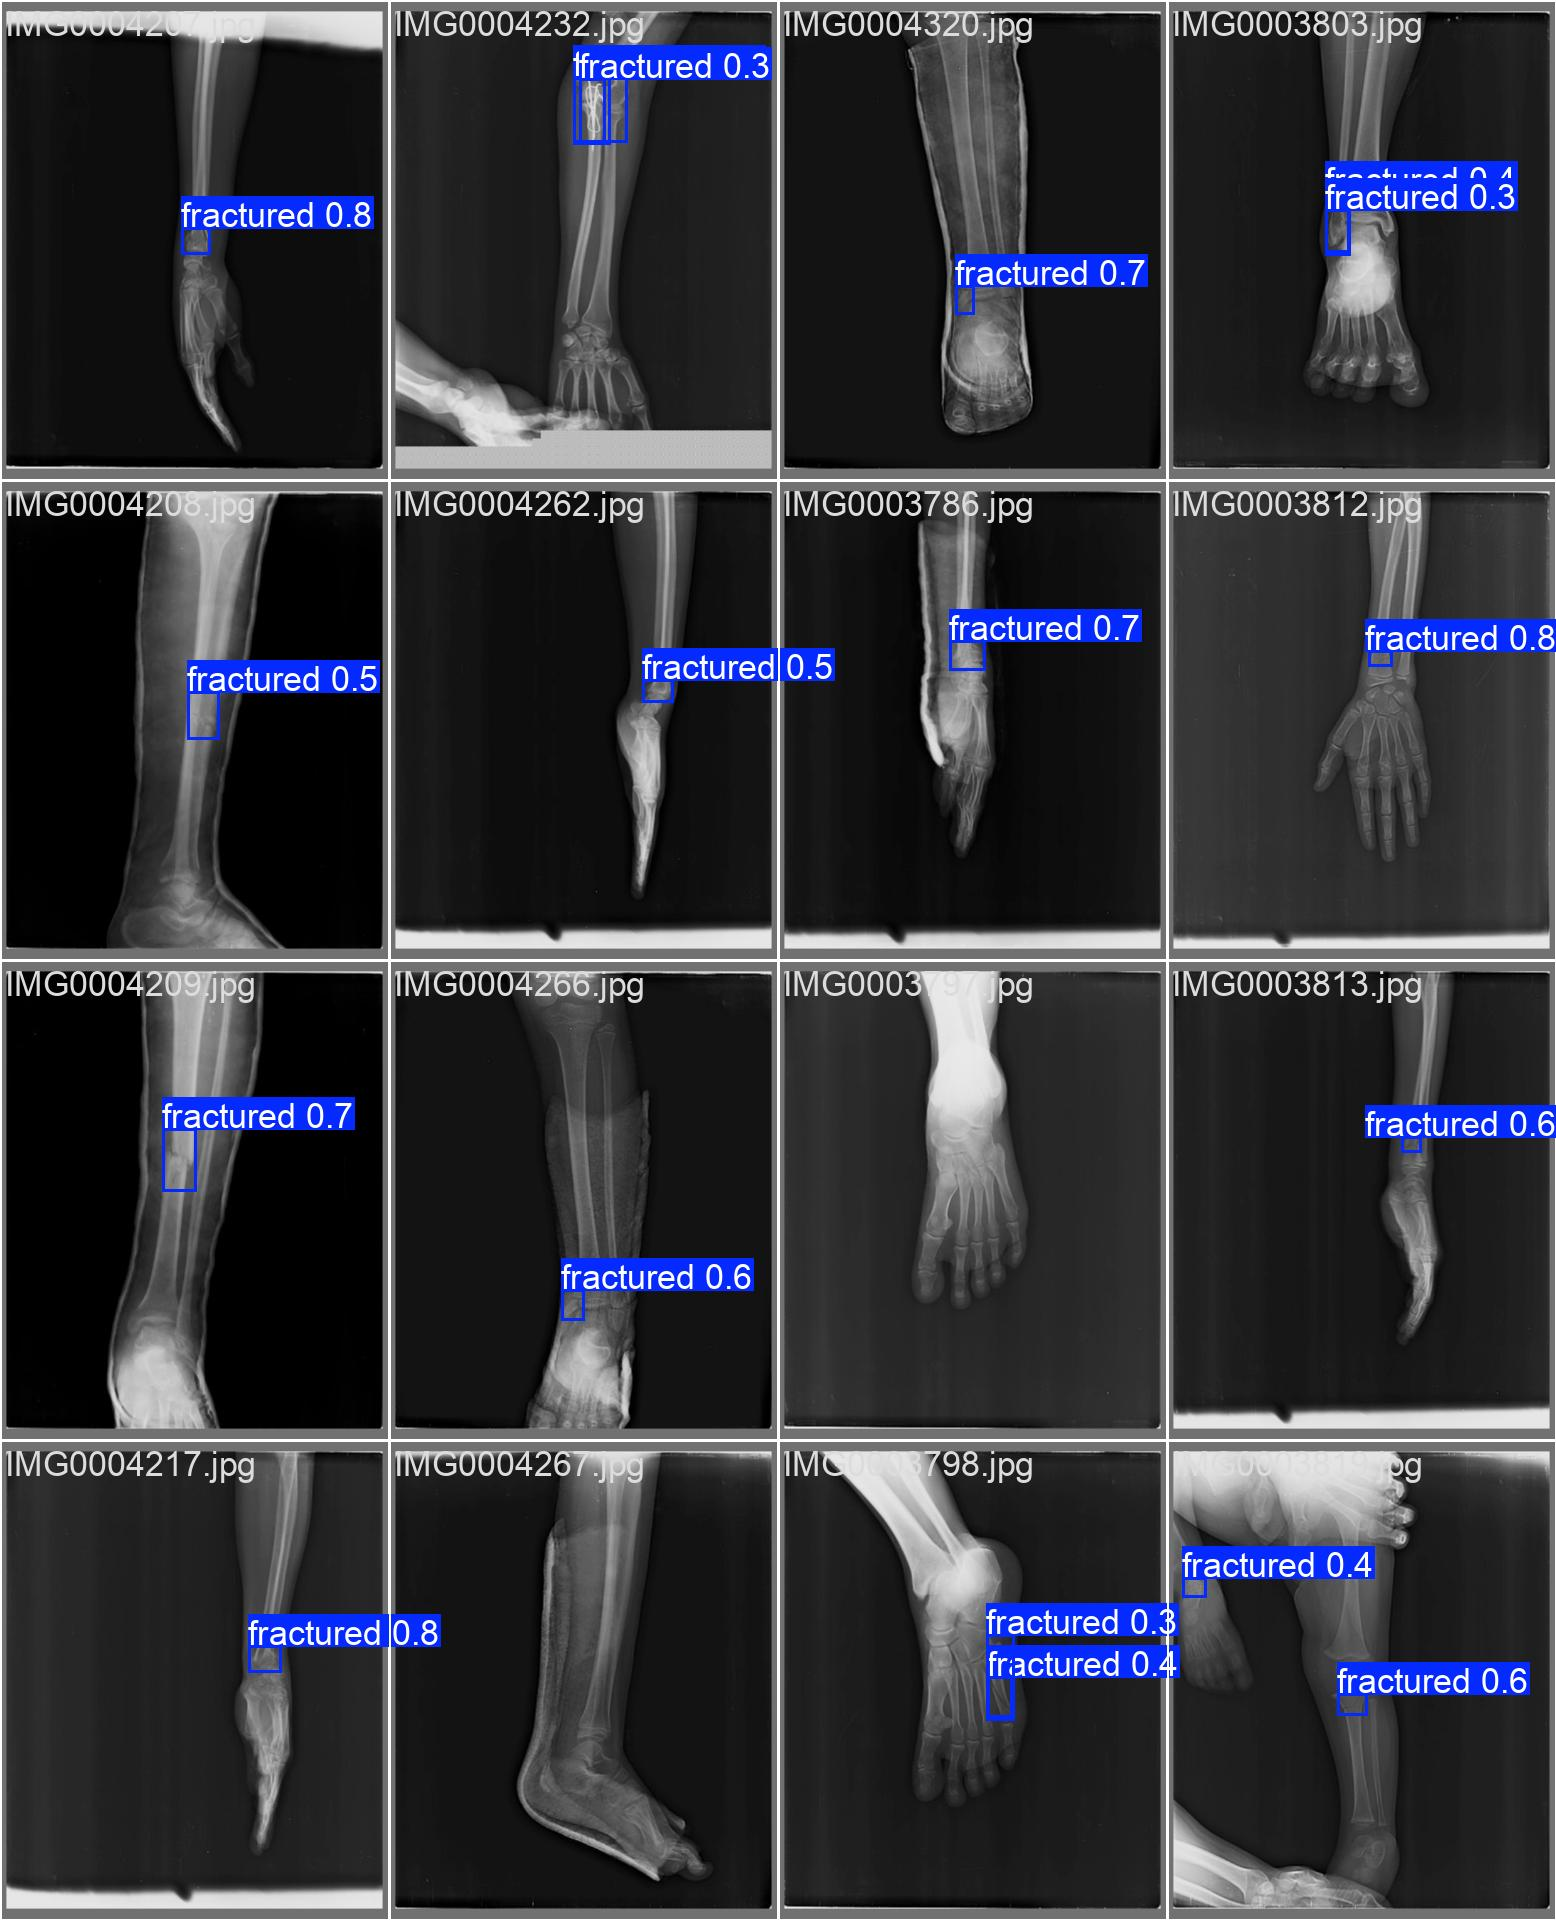

## Analysis

After training for 100 epoch and adjusting the different hyperparameters to see which works best for the dataset, it was determined that letting the YOLO model set its own parameters produced the best results. The hyperparameters that YOLO model set for itself were:

* *lr = 0.002*
* *optimizer = AdamW*
* *momentum = 0.9*
* *decay = 0.0*

With these hyperparameters, the validation precision was 0.842 and the recall was 0.484.

* **Precision** is defined as the percentage of predictions made by the model that are correct.

* **Recall** is defined as the percentage of relevant data points that the were correctly identified by the model.

A precision score of 0.842 demonstrates that the YOLO model effectively only generated bounding boxes around true fractures. However, a recall score of 0.484 conveys that the model was not able to detect all of the fractures presented during validation. See the confusion matrix below for information about model performance during the validation.

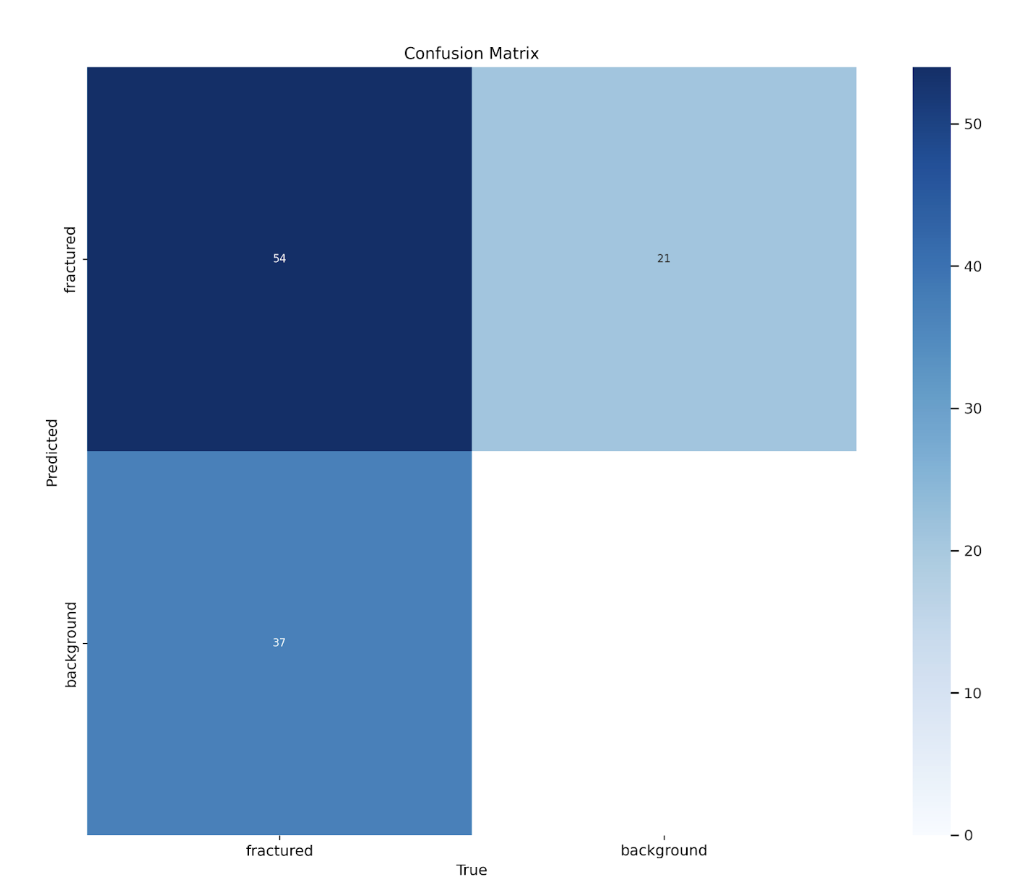

The figure below is a graph of the model's precision and recall over 100 epochs. Note the scaling of the two graphs.

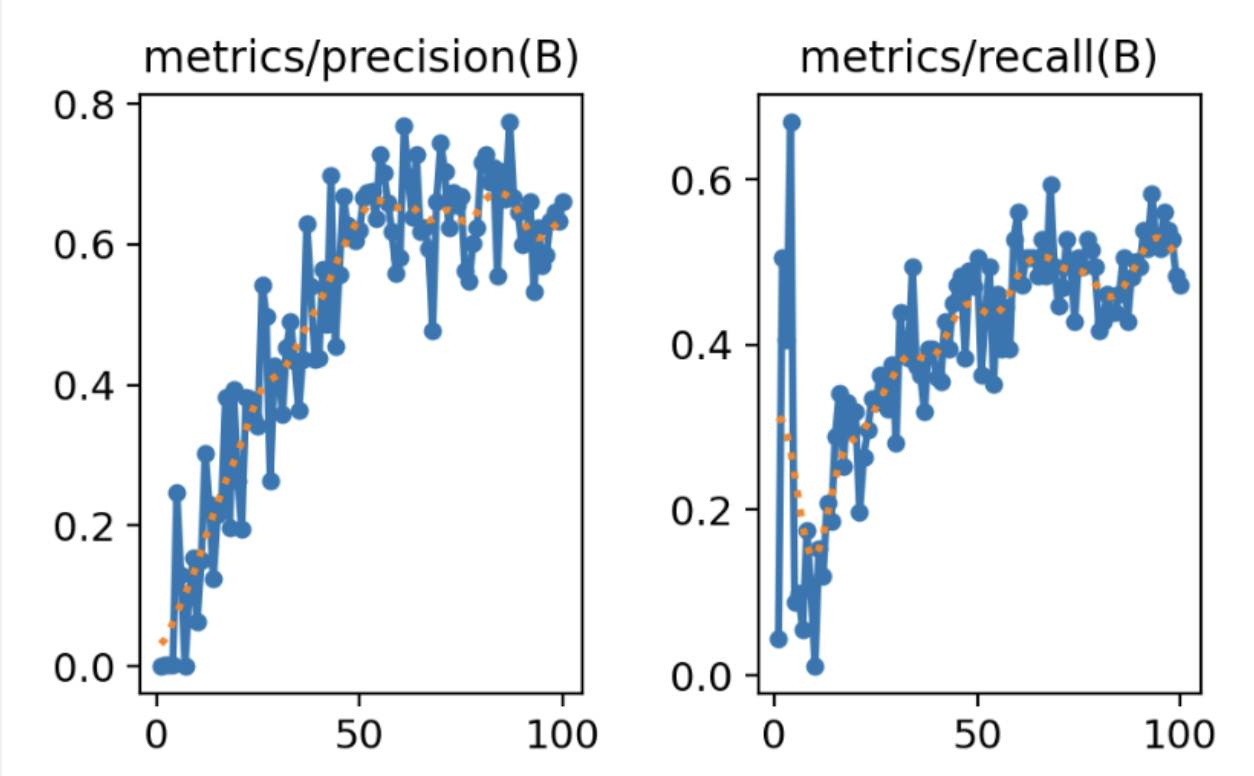

Below are figures of precision and recall from two studies found in literature. The first, from Liu (2024), shows that his model yieled a precision and recall score of approximately 0.9 and 0.8 after epoch 50, respectively.

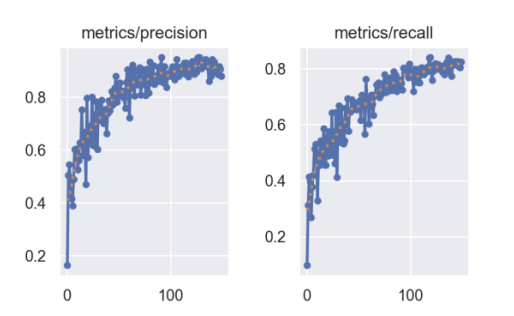

Liu, 2024

Additionally, the figure below, from Samathai et al. (2022), shows an accuracy score of above 0.8 after epoch 50.

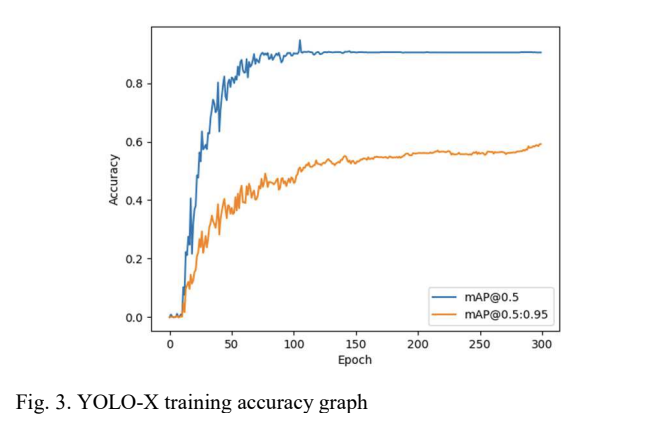

Samathai et al, 2022

The precision of the YOLO model in this write-up was comporable to those found in literature. However, the recall score was significantly lower, with a difference of approximently 0.3. Additionally, the graphs from the previous iterature demonstrate metrics that eventually converges. On the contrary, of the metrics in this write-up, only precision converges.

The main challenge faced was formatting the "y" data to be compatible with YOLO. The "y" variable of a YOLO model needs to be in the form of a vector, and the vector needs to contain floats about the dimensions of the predicted bounding box. Ultimately, the dimensions of the box were computed manually, and the vectors were made and labeled accordingly.

## Conclusion

The YOLO model has become a popular extension of the typical convolutional neural network, as the model is able to classify multiple objects at once, and in real time. One problem real-world problem that YOLO has been used to solve is classifying fractured bones. This was done by splitting a dataset into a train and validation set, running a baseline model, investigating hyperparameter tuning, and evaluating metrics. The metrics found yielded a precision and recall score of 0.842 and 0.484, respectively.

Future work includes raising the recall score. One approach that could be taken is data augmentation. This includes resizing and rotating the images, normalizing the input values, and applying mix-up to the data. Additionally, the model could be applied to more complicated tasks, such as detecting different regions of the body.

The purpose of this training this model was to show that AI can be, and should be, used in union with healthcare professionals. Although a model, such as this one, should never replace medical professionals, the incorporation of AI into healthcare can revolutionize modern day medicine by speeding up the fracture diagnosis process and by alleviating the stress from healthcare workers. Not only will a CNN that detects bone fractures work as an aid for professionals, but this type of tool would provide a more positive experience for patients.

## References

1. Abedeen, I., Rahman, Md. A., Prottyasha, F. Z., Ahmed, T., Chowdhury, T. M., & Shatabda, S. (2023). Fracatlas: A dataset for fracture classification, localization and segmentation of musculoskeletal radiographs. Scientific Data, 10(1). https://doi.org/10.1038/s41597-023-02432-4

2. Aldughayfiq, B., Ashfaq, F., Jhanjhi, N. Z., & Humayun, M. (2023). Yolo-based deep learning model for pressure ulcer detection and classification. Healthcare, 11(9), 1222. https://doi.org/10.3390/healthcare11091222

3. Bhalerao, C. (2023). A deep dive into non-maximum suppression (NMS). Built In. https://builtin.com/machine-learning/non-maximum-suppression

4. Dey, I. (2023, July 12). What is Yolo algorithm. Medium. https://medium.com/@ishudey11032002/what-is-yolo-algorithm-ef5a3326510b

5. Hussain, A., Fareed, A., & Taseen, S. (2023). Bone fracture detection—can artificial intelligence replace doctors in orthopedic radiography analysis? Frontiers in Artificial Intelligence, 6. https://doi.org/10.3389/frai.2023.1223909  

6. Liu, B. (2024). DW-Yolo: Improved yolo for bone fracture detection. Sixth International Conference on Information Science, Electrical, and Automation Engineering (ISEAE 2024), 23. https://doi.org/10.1117/12.3037465

7. Mirkhan, A. (n.d.). Yolo Algorithm: Real-time object detection from A to Z. kili. https://kili-technology.com/data-labeling/machine-learning/yolo-algorithm-real-time-object-detection-from-a-to-z

8. Parti, A. (2024, June 11). Introduction to yolo object detection: Understanding the basics. Pareto. https://pareto.ai/blog/yolo-object-detection

9. Samothai, P., Sanguansat, P., Kheaksong, A., Srisomboon, K., & Lee, W. (2022). The evaluation of bone fracture detection of Yolo Series. 2022 37th International Technical Conference on Circuits/Systems, Computers and Communications (ITC-CSCC). https://doi.org/10.1109/itc-cscc55581.2022.9895016

10. Sharma, S. (2023). Artificial Intelligence for fracture diagnosis in orthopedic X-rays: Current developments and future potential. SICOT-J, 9, 21. https://doi.org/10.1051/sicotj/2023018